과적합 (Overfitting)

과적합은 머신러닝과 딥러닝 모델 학습에서 발생하는 문제로, 모델이 훈련 데이터에는 매우 잘 맞지만,

새로운 데이터(테스트 데이터 또는 실제 데이터)에는 성능이 저하되는 현상을 말합니다. 

즉, 모델이 훈련 데이터에 너무 치중하여 일반화 능력을 잃는 문제입니다.

[차수 차이에 따른 적합여부]

In [ ]:
# 데이터 생성: X 값은 -3부터 3까지의 값, y 값은 sin(X) 값에 노이즈를 추가하여 생성합니다.

# 다항 회귀 모델: 차수를 1, 4, 15로 설정하여 각각 과소적합, 적절한 적합, 과적합을 나타냅니다.

# 학습 및 예측: 훈련 데이터와 테스트 데이터로 모델을 학습하고 예측합니다.

# 시각화: 각 차수별로 모델의 예측 결과를 그래프로 나타냅니다.

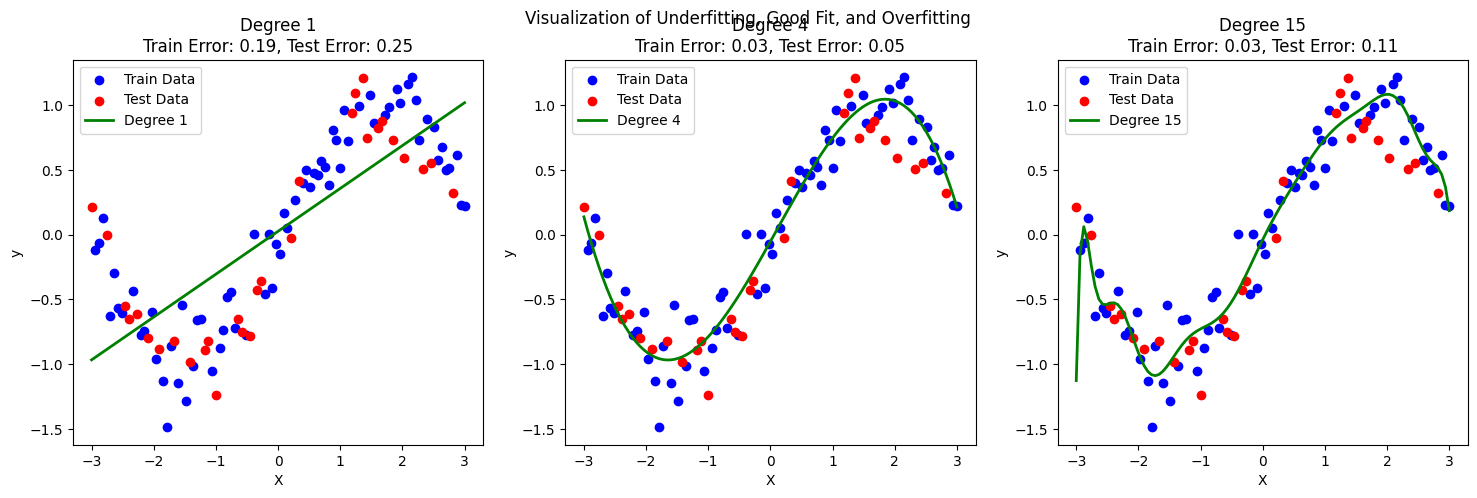

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0])

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 생성 및 학습
degrees = [1, 4, 15]  # 모델의 복잡도 (다항식 차수)
models = []
train_errors = []
test_errors = []

# 그래프 설정
plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    # 다항식 특징 생성
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append(model)

    # 예측 및 오차 계산
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    # 시각화
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color="green", linewidth=2, label=f"Degree {degree}")
    plt.title(f"Degree {degree}\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Visualization of Underfitting, Good Fit, and Overfitting")
plt.show()


# 과적합 제어 (라쏘)

In [ ]:
# 코드 설명
# Lasso 회귀 추가: Lasso 모델을 사용하여 L1 정규화를 적용했습니다.
# alpha 값: alpha=0.01로 설정하여 정규화 강도를 조절합니다.
# 비교 시각화: 위쪽 그래프는 기본 선형 회귀 모델, 아래쪽 그래프는 Lasso 회귀 모델입니다.

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+00, tolerance: 3.688e-03
  model = cd_fast.enet_coordinate_descent(


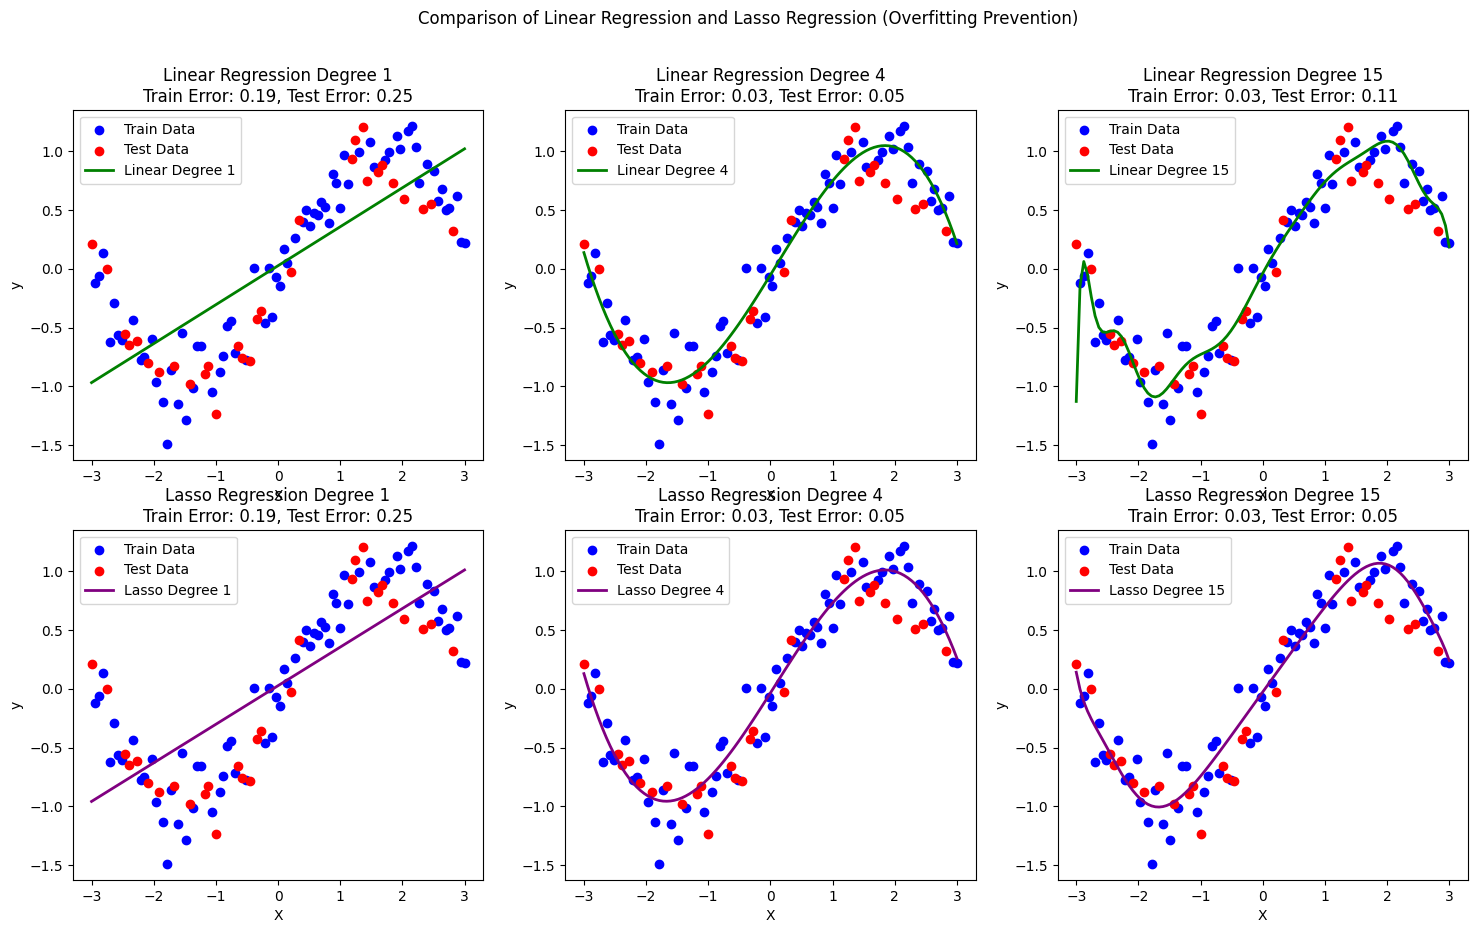

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0])

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 차수 설정
degrees = [1, 4, 15]
lasso_alpha = 0.01  # Lasso 정규화 강도 (alpha 값)

# 그래프 설정
plt.figure(figsize=(18, 10))

for i, degree in enumerate(degrees):
    # 다항식 특징 생성
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 기본 선형 회귀 모델 학습
    lin_model = LinearRegression()
    lin_model.fit(X_train_poly, y_train)

    # Lasso 회귀 모델 학습
    lasso_model = Lasso(alpha=lasso_alpha, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)

    # 기본 모델 예측 및 오차 계산
    y_train_pred = lin_model.predict(X_train_poly)
    y_test_pred = lin_model.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Lasso 모델 예측 및 오차 계산
    y_train_pred_lasso = lasso_model.predict(X_train_poly)
    y_test_pred_lasso = lasso_model.predict(X_test_poly)
    train_error_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    test_error_lasso = mean_squared_error(y_test, y_test_pred_lasso)

    # 시각화 (기본 선형 회귀)
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = lin_model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color="green", linewidth=2, label=f"Linear Degree {degree}")
    plt.title(f"Linear Regression Degree {degree}\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

    # 시각화 (Lasso 회귀)
    plt.subplot(2, 3, i + 4)
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")
    y_plot_lasso = lasso_model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot_lasso, color="purple", linewidth=2, label=f"Lasso Degree {degree}")
    plt.title(f"Lasso Regression Degree {degree}\nTrain Error: {train_error_lasso:.2f}, Test Error: {test_error_lasso:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Comparison of Linear Regression and Lasso Regression (Overfitting Prevention)")
plt.show()


# Early Stopping 적용 MLP Regressor

조기 종료는 검증 오차가 더 이상 감소하지 않을 때 학습을 멈추는 기법입니다.
이를 통해 과적합을 줄이고 모델의 일반화 성능을 개선할 수 있습니다.

In [ ]:
# 코드 설명
# MLP Regressor:

# early_stopping=True로 설정하여 검증 오차가 더 이상 개선되지 않으면 학습을 중단합니다.
# validation_fraction=0.2는 훈련 데이터의 20%를 검증 데이터로 사용합니다.
# max_iter=10000은 최대 반복 횟수를 지정합니다.
# 비교 시각화:

# 위쪽 그래프는 기본 선형 회귀 모델입니다.
# 아래쪽 그래프는 조기 종료가 적용된 MLP Regressor 모델입니다

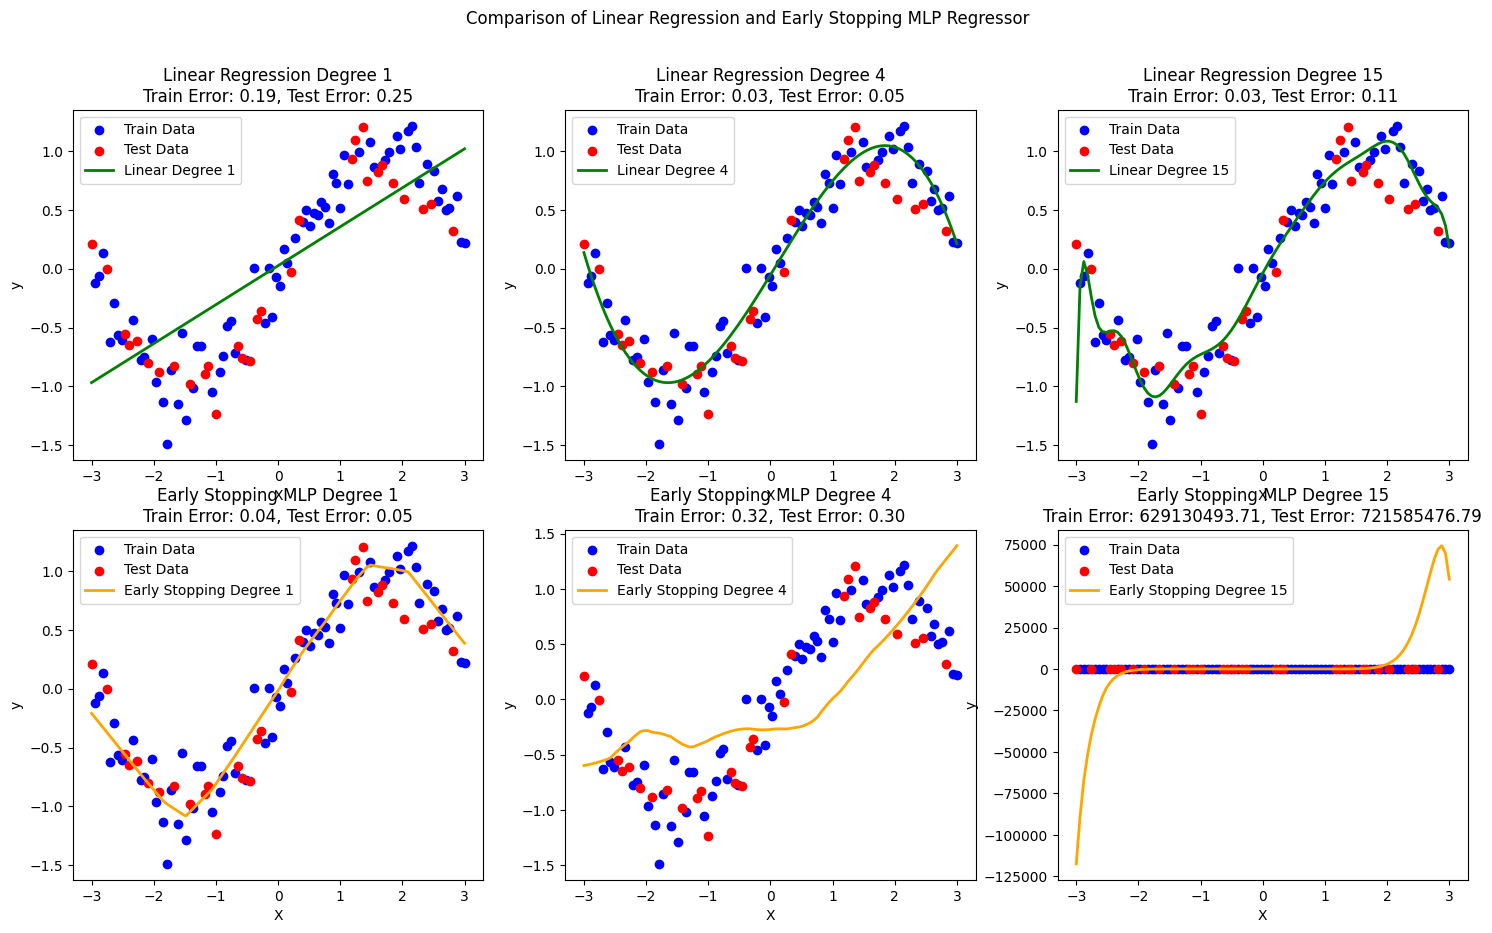

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0])

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 차수 설정
degrees = [1, 4, 15]

# 그래프 설정
plt.figure(figsize=(18, 10))

for i, degree in enumerate(degrees):
    # 다항식 특징 생성
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # 기본 선형 회귀 모델 학습
    lin_model = LinearRegression()
    lin_model.fit(X_train_poly, y_train)

    # 조기 종료가 적용된 MLP Regressor 모델 학습
    early_stopping_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        max_iter=10000,
        tol=1e-4,
        early_stopping=True,
        validation_fraction=0.2,
        random_state=42
    )
    early_stopping_model.fit(X_train_poly, y_train)

    # 기본 모델 예측 및 오차 계산
    y_train_pred = lin_model.predict(X_train_poly)
    y_test_pred = lin_model.predict(X_test_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # 조기 종료 모델 예측 및 오차 계산
    y_train_pred_early_stopping = early_stopping_model.predict(X_train_poly)
    y_test_pred_early_stopping = early_stopping_model.predict(X_test_poly)
    train_error_early_stopping = mean_squared_error(y_train, y_train_pred_early_stopping)
    test_error_early_stopping = mean_squared_error(y_test, y_test_pred_early_stopping)

    # 시각화 (기본 선형 회귀)
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = lin_model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color="green", linewidth=2, label=f"Linear Degree {degree}")
    plt.title(f"Linear Regression Degree {degree}\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

    # 시각화 (조기 종료 MLP Regressor)
    plt.subplot(2, 3, i + 4)
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")
    y_plot_early_stopping = early_stopping_model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot_early_stopping, color="orange", linewidth=2, label=f"Early Stopping Degree {degree}")
    plt.title(f"Early Stopping MLP Degree {degree}\nTrain Error: {train_error_early_stopping:.2f}, Test Error: {test_error_early_stopping:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Comparison of Linear Regression and Early Stopping MLP Regressor")
plt.show()
